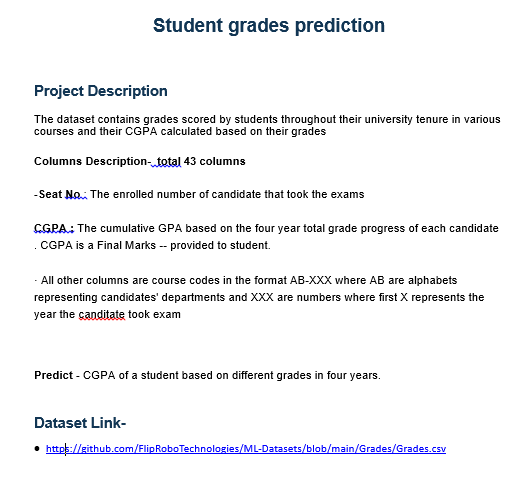

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [ ]:
# this is regression problem as CGPA is float and continues data 

In [5]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
for i in df.columns:
    print(df[i].value_counts())

Seat No.
CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: count, Length: 571, dtype: int64
PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64
HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64
CY-105
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64
HS-105/12
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: count, dtype: int64
MT-111
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: count, dtype: int64
CS-105
A     15

In [8]:
df.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [ ]:
# we can see A grade many time so we can replace nun value as A 

In [9]:
df.fillna('A',inplace=True)
df.isna().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [10]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [ ]:
# no null value 

<Axes: >

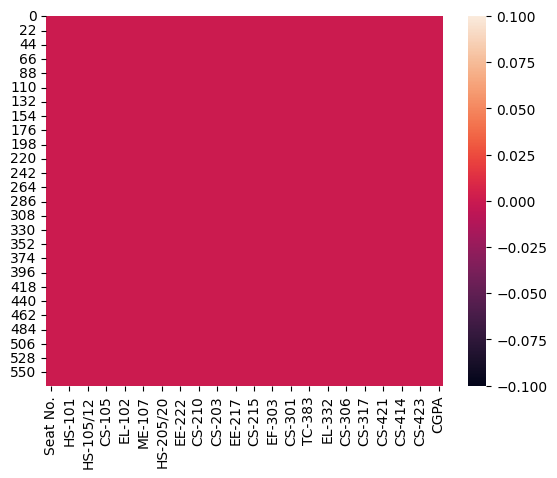

In [11]:
sns.heatmap(df.isnull())

In [19]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [20]:
# separating categorical and numerical column

num_col=[]
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('cat_col :-',cat_col)


print('num_col :-',num_col)




cat_col :- ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
num_col :- ['CGPA']


In [22]:
df.nunique().to_frame('No of unique values')

No of unique values
Seat No.                   571
PH-121                      13
HS-101                      12
CY-105                      13
HS-105/12                   13
MT-111                      13
CS-105                      11
CS-106                      13
EL-102                      13
EE-119                      12
ME-107                      13
CS-107                      14
HS-205/20                   13
MT-222                      14
EE-222                      13
MT-224                      14
CS-210                      14
CS-211                      14
CS-203                      13
CS-214                      13
EE-217                      13
CS-212                      12
CS-215                      14
MT-331                      12
EF-303                      12
HS-304                      14
CS-301                      12
CS-302                      11
TC-383                      12
MT-442                      12
EL-332                      13
CS-318                      14
CS-306                      13
CS-312                      14
CS-317                      12
CS-403                      11
CS-421                      13
CS-406                      14
CS-414                      13
CS-419                      12
CS-423                      12
CS-412                      13
CGPA                       491

In [27]:
df['Seat No.'].unique()   # there are lots of unique values in 'Seat No' which not seem natural so we can drop this column

array(['CS-97001', 'CS-97002', 'CS-97003', 'CS-97004', 'CS-97005',
       'CS-97006', 'CS-97007', 'CS-97008', 'CS-97009', 'CS-97010',
       'CS-97011', 'CS-97012', 'CS-97013', 'CS-97014', 'CS-97015',
       'CS-97016', 'CS-97017', 'CS-97018', 'CS-97019', 'CS-97020',
       'CS-97021', 'CS-97022', 'CS-97023', 'CS-97024', 'CS-97025',
       'CS-97026', 'CS-97027', 'CS-97028', 'CS-97029', 'CS-97030',
       'CS-97031', 'CS-97032', 'CS-97033', 'CS-97034', 'CS-97035',
       'CS-97036', 'CS-97037', 'CS-97038', 'CS-97039', 'CS-97040',
       'CS-97041', 'CS-97042', 'CS-97043', 'CS-97044', 'CS-97045',
       'CS-97046', 'CS-97047', 'CS-97048', 'CS-97049', 'CS-97050',
       'CS-97051', 'CS-97052', 'CS-97053', 'CS-97054', 'CS-97055',
       'CS-97056', 'CS-97057', 'CS-97058', 'CS-97059', 'CS-97060',
       'CS-97061', 'CS-97062', 'CS-97063', 'CS-97064', 'CS-97065',
       'CS-97066', 'CS-97067', 'CS-97068', 'CS-97069', 'CS-97070',
       'CS-97071', 'CS-97072', 'CS-97073', 'CS-97074', 'CS-970

In [30]:
df.drop('Seat No.',axis=1,inplace=True)

In [33]:
df.head()

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0     B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1      A      D     D+         D     B-      C      D      A     D+      D   
2      A      B      A        B-     B+      A     B-     B+     A-     A-   
3      D     C+     D+         D      D     A-     D+     C-      D     C+   
4     A-     A-     A-        B+      A      A     A-     B+      A     A-   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 42 columns]

In [41]:
# Encoding catogorical column using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df
    

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0       5.0    10.0     8.0        6.0     8.0    10.0     9.0     8.0   
1       0.0     9.0    10.0        9.0     5.0     6.0     9.0     0.0   
2       0.0     3.0     0.0        5.0     4.0     0.0     5.0     4.0   
3       9.0     7.0    10.0        9.0     9.0     2.0    10.0     8.0   
4       2.0     2.0     2.0        4.0     0.0     0.0     2.0     4.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566     3.0     0.0     0.0        2.0     1.0     0.0     2.0     2.0   
567     1.0     0.0     0.0        0.0     0.0     0.0     0.0     2.0   
568     3.0     0.0     2.0        4.0     0.0     0.0     0.0     0.0   
569     0.0     4.0     9.0        0.0     9.0    10.0     5.0     8.0   
570     6.0     9.0     9.0        6.0     6.0    10.0     3.0     7.0   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       5.0     8.0  ...     8.0     8.0     8.0     8.0     2.0     0.0   
1      10.0     9.0  ...    10.0     9.0     6.0     9.0     2.0     5.0   
2       2.0     2.0  ...     3.0     3.0     0.0     6.0     0.0     0.0   
3       9.0     7.0  ...    10.0     6.0    10.0     8.0     5.0     3.0   
4       0.0     2.0  ...     5.0     4.0     4.0     5.0     2.0     0.0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566     1.0     4.0  ...     2.0     2.0     0.0     0.0     0.0     4.0   
567     0.0     0.0  ...     4.0     4.0     0.0     0.0     2.0     3.0   
568     0.0     3.0  ...     2.0     3.0     0.0     4.0     0.0     6.0   
569     5.0     8.0  ...     9.0     3.0     3.0     8.0     9.0     6.0   
570     6.0    10.0  ...     7.0     6.0     5.0     9.0    11.0     8.0   

     CS-419  CS-423  CS-412   CGPA  
0       8.0     3.0     2.0  2.205  
1       6.0     6.0     3.0  2.008  
2       0.0     2.0     0.0  3.608  
3       7.0     7.0     7.0  1.906  
4       2.0     2.0     0.0  3.448  
..      ...     ...     ...    ...  
566     4.0     3.0     0.0  3.798  
567     2.0     6.0     2.0  3.772  
568     4.0     2.0     2.0  3.470  
569     3.0     5.0     6.0  2.193  
570     4.0     9.0     8.0  1.753  

[571 rows x 42 columns]

#### Data visualization

In [51]:
plt.figure(figsize=(100, 125), facecolor='white')

p = 1

for i in df.columns:
    if p <= 42:
        axs = plt.subplot(7, 6, p)  # Adjusted to 7 rows by 6 columns
        sns.histplot(df[i], kde=True, color='m', ax=axs)
        plt.xlabel(i, fontsize=20)  # Corrected to use column name as label
        plt.ylabel('count', fontsize=20)
        
        p += 1
plt.tight_layout()
plt.show()

In [54]:
plt.figure(figsize=(100, 125), facecolor='white')

p = 1

for i in df.columns:
    if p <= 42:
        axs = plt.subplot(7, 6, p)  # Adjusted to 7 rows by 6 columns
        sns.countplot(x=df[i], color='m')
        plt.xlabel(i, fontsize=20)  # Corrected to use column name as label
        plt.ylabel('count', fontsize=20)
        
        p += 1
plt.tight_layout()
plt.show()

In [ ]:
# it shows tha most numbers are related A

In [55]:

# checking outliars



plt.figure(figsize=(100, 125), facecolor='white')

p = 1

for i in df.columns:
    if p <= 42:
        axs = plt.subplot(7, 6, p)  # Adjusted to 7 rows by 6 columns
        sns.boxplot(df[i], color='m')
        plt.xlabel(i, fontsize=20)  # Corrected to use column name as label
        plt.ylabel('count', fontsize=20)
        
        p += 1
plt.tight_layout()
plt.show()

In [57]:
col=df.drop('CGPA',axis=1)

from scipy.stats import zscore

z=np.abs(zscore(col))
z

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0    0.400402  1.770900  1.722261   0.549869  1.373449  2.657832  1.787323   
1    1.242052  1.411559  2.397448   1.488043  0.371013  1.173242  1.787323   
2    1.242052  0.744483  0.978490   0.237145  0.036867  1.053643  0.323628   
3    1.714365  0.692879  2.397448   1.488043  1.707595  0.311348  2.153246   
4    0.585070  1.103823  0.303302   0.075580  1.299715  1.053643  0.774143   
..        ...       ...       ...        ...       ...       ...       ...   
566  0.256579  1.822504  0.978490   0.701029  0.965569  1.053643  0.774143   
567  0.913561  1.822504  0.978490   1.326478  1.299715  1.053643  1.505991   
568  0.256579  1.822504  0.303302   0.075580  1.299715  1.053643  1.505991   
569  1.242052  0.385142  2.059854   1.326478  1.707595  2.657832  0.323628   
570  0.728893  1.411559  2.059854   0.549869  0.705158  2.657832  0.408220   

       EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317  \
0    1.333269  0.420926  1.024056  ...  0.666773  1.168087  1.157731   
1    1.302115  2.298653  1.341330  ...  1.706066  1.760167  1.511809   
2    0.015577  0.705709  0.879588  ...  0.718950  0.312112  0.612661   
3    1.333269  1.923107  0.706782  ...  1.359635  1.760167  0.449574   
4    0.015577  1.456800  0.879588  ...  0.718950  0.279968  0.258583   
..        ...       ...       ...  ...       ...       ...       ...   
566  0.643269  1.081255  0.245040  ...  0.026088  0.608152  0.966739   
567  0.643269  1.456800  1.514136  ...  0.718950  0.016072  0.258583   
568  1.302115  1.456800  0.562314  ...  0.026088  0.608152  0.612661   
569  1.333269  0.420926  1.024056  ...  0.026088  1.464127  0.612661   
570  1.003846  0.796472  1.658604  ...  2.052497  0.872048  0.449574   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0    1.533685  0.951459  0.256296  0.960095  1.720899  0.322651  0.303223  
1    0.862110  1.306779  0.256296  1.042149  0.899299  0.732122  0.089385  
2    1.152616  0.240821  1.002952  0.960095  1.565500  0.674242  1.088438  
3    2.205260  0.951459  0.863690  0.241251  1.310099  1.083713  1.659817  
4    0.190534  0.114499  0.256296  0.960095  0.743900  0.674242  1.088438  
..        ...       ...       ...       ...       ...       ...       ...  
566  1.152616  1.891095  1.002952  0.641700  0.077699  0.322651  1.088438  
567  1.152616  1.891095  0.256296  0.241251  0.743900  0.732122  0.303223  
568  1.152616  0.469818  1.002952  1.442597  0.077699  0.674242  0.303223  
569  0.145253  0.951459  2.357004  1.442597  0.333100  0.380531  1.267209  
570  0.526322  1.306779  3.103661  2.243495  0.077699  1.786896  2.052424  

[571 rows x 41 columns]

In [58]:
# removing the datd above the zscore and creatin the new df

df_cleaned=df[(z<3).all(axis=1)]
print(df_cleaned.shape)



(542, 42)


In [59]:
df.shape

(571, 42)

In [60]:
print('Data Loss percentage: ' ,((df.shape[0]-df_cleaned.shape[0])/df.shape[0])*100)
  # precentage should not more than 10% other wise we have to use another method to remove outliars or something else

Data Loss percentage:  5.078809106830122


In [62]:

# checking distribution



plt.figure(figsize=(100, 125), facecolor='white')

p = 1

for i in df_cleaned.columns:
    if p <= 42:
        axs = plt.subplot(7, 6, p)  # Adjusted to 7 rows by 6 columns
        sns.distplot(df_cleaned[i], color='m')
        plt.xlabel(i, fontsize=20)  # Corrected to use column name as label
        plt.ylabel('count', fontsize=20)
        
        p += 1
plt.tight_layout()
plt.show()

In [63]:
# checking skewness if closer to 0 means normal other wise skwed 

df_cleaned.skew()

PH-121       0.592410
HS-101       0.088020
CY-105       0.962807
HS-105/12    0.337282
MT-111       0.477815
CS-105       0.984010
CS-106       0.619400
EL-102       0.530779
EE-119       0.606622
ME-107       0.121958
CS-107       0.432845
HS-205/20    0.800594
MT-222       0.189026
EE-222       0.738966
MT-224       0.428545
CS-210       0.668986
CS-211       0.088635
CS-203       0.282218
CS-214       0.035660
EE-217       0.731442
CS-212       0.401108
CS-215       0.145560
MT-331       0.668969
EF-303       0.330780
HS-304       0.419474
CS-301       0.406339
CS-302       0.604916
TC-383       0.370173
MT-442       0.866924
EL-332       0.438232
CS-318       0.326247
CS-306       0.417350
CS-312       0.442264
CS-317       0.142713
CS-403       0.603046
CS-421       0.061492
CS-406       1.163254
CS-414       0.885086
CS-419       0.450610
CS-423       0.480597
CS-412       0.744978
CGPA        -0.451131
dtype: float64

In [ ]:
# all good

<Axes: >

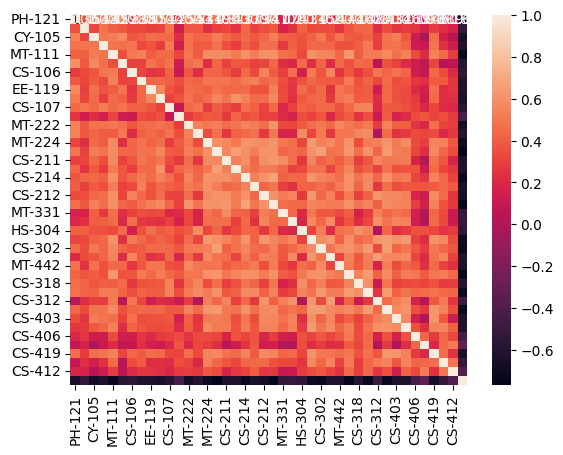

In [64]:
sns.heatmap(df_cleaned.corr(),annot=True)

In [72]:
x=df_cleaned.drop('CGPA',axis=1)
y=df_cleaned['CGPA']

print(x)
print(y)

     PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0       5.0    10.0     8.0        6.0     8.0    10.0     9.0     8.0   
1       0.0     9.0    10.0        9.0     5.0     6.0     9.0     0.0   
2       0.0     3.0     0.0        5.0     4.0     0.0     5.0     4.0   
3       9.0     7.0    10.0        9.0     9.0     2.0    10.0     8.0   
4       2.0     2.0     2.0        4.0     0.0     0.0     2.0     4.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
565    11.0    11.0     9.0        8.0     0.0    10.0     9.0     0.0   
566     3.0     0.0     0.0        2.0     1.0     0.0     2.0     2.0   
567     1.0     0.0     0.0        0.0     0.0     0.0     0.0     2.0   
568     3.0     0.0     2.0        4.0     0.0     0.0     0.0     0.0   
569     0.0     4.0     9.0        0.0     9.0    10.0     5.0     8.0   

     EE-119  ME-107  ...  CS-306  CS-312  CS-317  CS-403  CS-421  CS-406  \
0       5.0     8.0  ...     6.0   

In [73]:
# Data Standardisation

from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

x=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)
x

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0    0.459955  1.851083  1.838216   0.603480  1.477380  2.791913  1.854458   
1   -1.217674  1.484518  2.543071   1.560807  0.440600  1.259542  1.854458   
2   -1.217674 -0.714868 -0.981206   0.284372  0.095006 -1.039016  0.362634   
3    1.802058  0.751389  2.543071   1.560807  1.822974 -0.272830  2.227414   
4   -0.546622 -1.081433 -0.276350  -0.034737 -1.287368 -1.039016 -0.756234   
..        ...       ...       ...        ...       ...       ...       ...   
537  2.473110  2.217647  2.190644   1.241698 -1.287368  2.791913  1.854458   
538 -0.211096 -1.814561 -0.981206  -0.672954 -0.941774 -1.039016 -0.756234   
539 -0.882148 -1.814561 -0.981206  -1.311172 -1.287368 -1.039016 -1.502146   
540 -0.211096 -1.814561 -0.276350  -0.034737 -1.287368 -1.039016 -1.502146   
541 -1.217674 -0.348304  2.190644  -1.311172  1.822974  2.791913  0.362634   

       EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317  \
0    1.420730  0.480561  1.083303  ...  0.752869  1.214124  1.230411   
1   -1.278781  2.407072  1.405559  ...  1.844897  1.818121  1.597234   
2    0.070974 -0.675345 -0.850232  ... -0.703170 -0.295869 -0.603700   
3    1.420730  2.021770  0.761047  ...  1.480888  1.818121  0.496767   
4    0.070974 -1.445949 -0.850232  ... -0.703170  0.308128 -0.236878   
..        ...       ...       ...  ...       ...       ...       ...   
537 -1.278781 -1.445949 -1.494744  ... -1.431189 -1.201865 -1.704167   
538 -0.603904 -1.060647 -0.205721  ...  0.024849 -0.597868 -0.970522   
539 -0.603904 -1.445949 -1.494744  ... -0.703170  0.006129 -0.236878   
540 -1.278781 -1.445949 -0.527977  ...  0.024849 -0.597868 -0.603700   
541  1.420730  0.480561  1.083303  ...  0.024849  1.516122 -0.603700   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0    1.529171  1.056236 -0.199016 -1.033847  1.792925 -0.308487 -0.267677  
1    0.857525  1.433116 -0.199016  1.377277  0.946808  0.777227  0.189992  
2   -1.157411  0.302477 -1.058511 -1.033847 -1.591543 -0.670392 -1.183015  
3    2.200816  1.056236  1.090226  0.412827  1.369866  1.139132  2.020667  
4    0.185880 -0.074402 -0.199016 -1.033847 -0.745426 -0.670392 -1.183015  
..        ...       ...       ...       ...       ...       ...       ...  
537 -1.157411 -1.958800 -1.058511 -1.033847 -1.591543 -1.394201 -1.183015  
538 -1.157411 -1.958800 -1.058511  0.895052  0.100691 -0.308487 -1.183015  
539 -1.157411 -1.958800 -0.199016  0.412827 -0.745426  0.777227 -0.267677  
540 -1.157411 -0.451282 -1.058511  1.859501  0.100691 -0.670392 -0.267677  
541 -0.149943  1.056236  2.809216  1.859501 -0.322367  0.415322  1.562998  

[542 rows x 41 columns]

In [74]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

# perfect positive corelation with target hence no need to drop any feature

VIF Values   Features
0     2.636645     PH-121
1     1.782070     HS-101
2     2.451320     CY-105
3     2.327318  HS-105/12
4     2.674889     MT-111
5     2.349720     CS-105
6     1.949133     CS-106
7     1.881853     EL-102
8     2.142105     EE-119
9     2.297551     ME-107
10    2.328638     CS-107
11    1.683737  HS-205/20
12    2.344528     MT-222
13    2.414208     EE-222
14    2.976599     MT-224
15    3.191819     CS-210
16    2.680714     CS-211
17    2.606503     CS-203
18    2.843117     CS-214
19    2.411083     EE-217
20    2.949760     CS-212
21    3.039794     CS-215
22    2.014167     MT-331
23    2.186378     EF-303
24    2.340261     HS-304
25    3.205942     CS-301
26    2.861004     CS-302
27    3.017025     TC-383
28    2.306642     MT-442
29    3.144323     EL-332
30    2.341653     CS-318
31    3.285743     CS-306
32    3.773164     CS-312
33    3.095283     CS-317
34    2.615231     CS-403
35    2.711456     CS-421
36    1.826541     CS-406
37    2.163725     CS-414
38    2.541761     CS-419
39    2.627943     CS-423
40    1.966757     CS-412

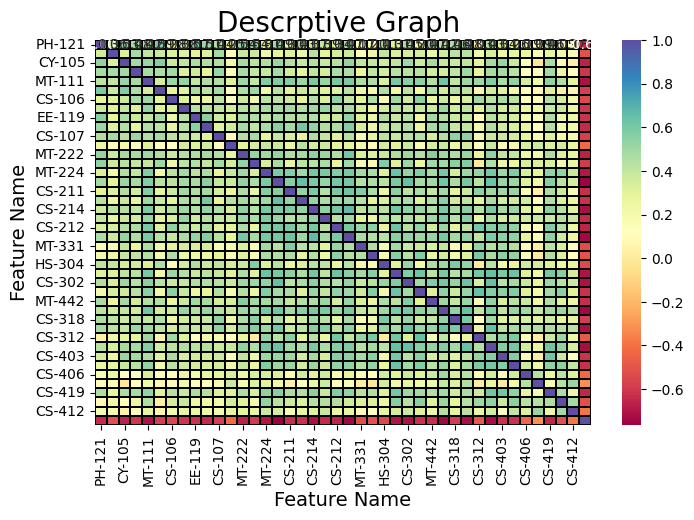

In [75]:
plt.figure(figsize=(8,5))
sns.heatmap(df_cleaned.corr(),annot=True,fmt='0.2f',linewidths=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Feature Name',fontsize=14)
plt.ylabel('Feature Name',fontsize=14)
plt.title('Descrptive Graph ',fontsize=20)
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Model building

In [76]:
# Creating Train test split

maxAcc=0
maxRS=0
for i in range ( 1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Max r2_scoer: ',maxAcc,'on random state: ',maxRS)


Max r2_scoer:  0.9641959853281576 on random state:  166


In [78]:
# here Max r2_scoer:  0.9641959853281576 which can not be possible in real life. It is may be due to overfitting, data leackage

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [79]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from  sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN


In [80]:
LR=LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
pred_Train=LR.predict(x_train)
print(LR)
print('R2_Score:', r2_score(y_test,predLR))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,predLR))
print('Mean scuared error: :', mean_squared_error(y_test,predLR))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,predLR)))

LinearRegression()
R2_Score: 0.9641959853281576
R2 Score on traing data:  0.8998818037290423
Mean absulute error: 0.08260255688222669
Mean scuared error: : 0.0117944464802816
Root Mean scuared error: : 0.10860223975720575


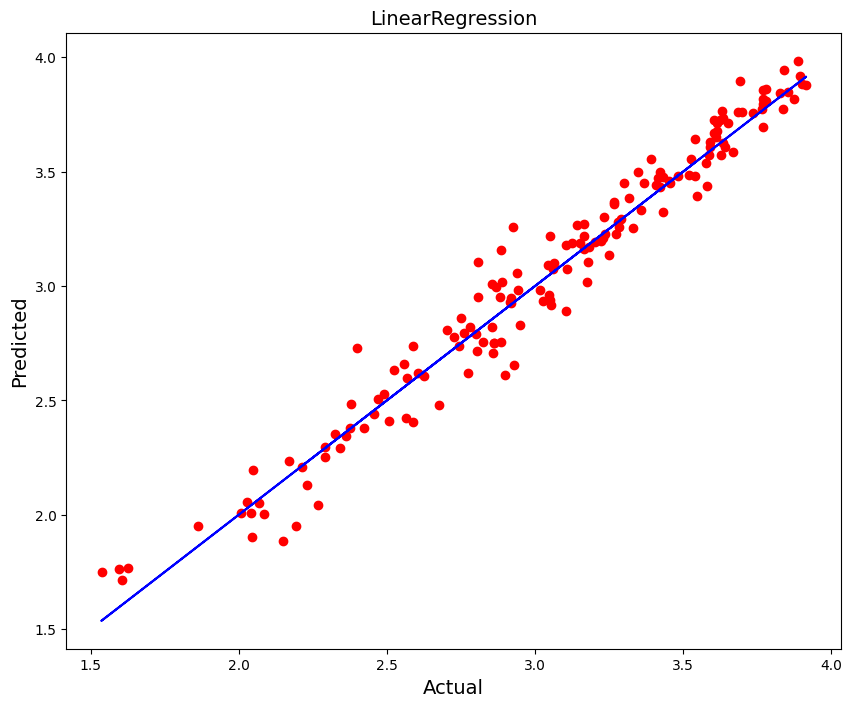

In [81]:
plt.figure(figsize=(10,8))
plt.scatter(x=predLR,y=y_test,color='red')
plt.plot(predLR,predLR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('LinearRegression',fontsize=14)
plt.show()

RandomForestRegressor()
R2_Score: 0.9487080909454606
R2 Score on traing data:  0.9788680119677489
Mean absulute error: 0.09797349693251516
Mean scuared error: : 0.016896420185276043
Root Mean scuared error: : 0.12998623075263027


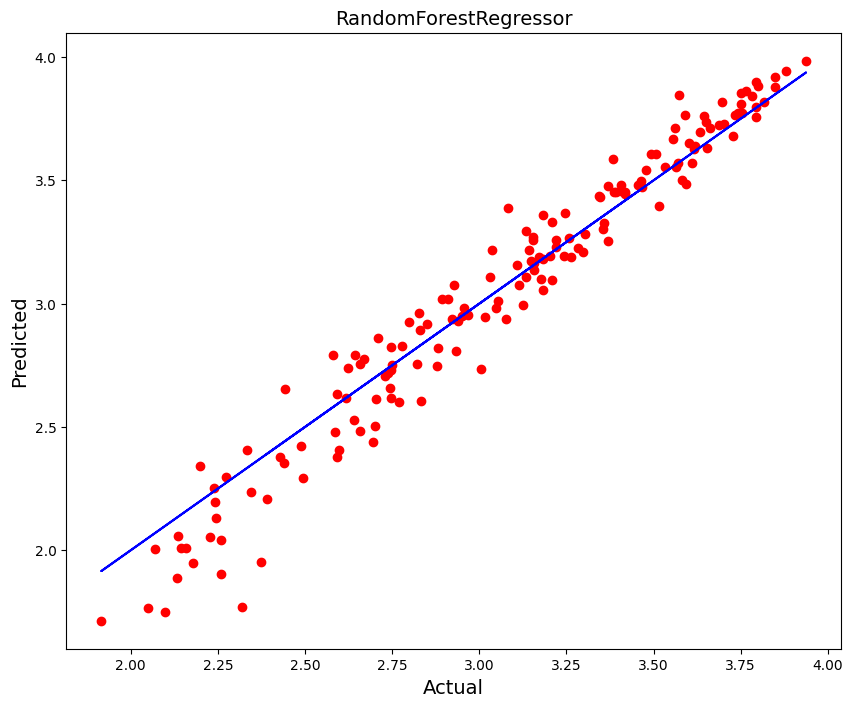

In [82]:
RDF=RandomForestRegressor()
RDF.fit(x_train,y_train)
pred_RDF=RDF.predict(x_test)
pred_Train=RDF.predict(x_train)
print(RDF)
print('R2_Score:', r2_score(y_test,pred_RDF))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_RDF))
print('Mean scuared error: :', mean_squared_error(y_test,pred_RDF))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_RDF)))

plt.figure(figsize=(10,8))
plt.scatter(x=pred_RDF,y=y_test,color='red')
plt.plot(pred_RDF,pred_RDF,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('RandomForestRegressor',fontsize=14)
plt.show()

KNeighborsRegressor()
R2_Score: 0.9690514984902825
R2 Score on traing data:  0.9046319737153319
Mean absulute error: 0.07845398773006135
Mean scuared error: : 0.010194958527607363
Root Mean scuared error: : 0.10097008729127337


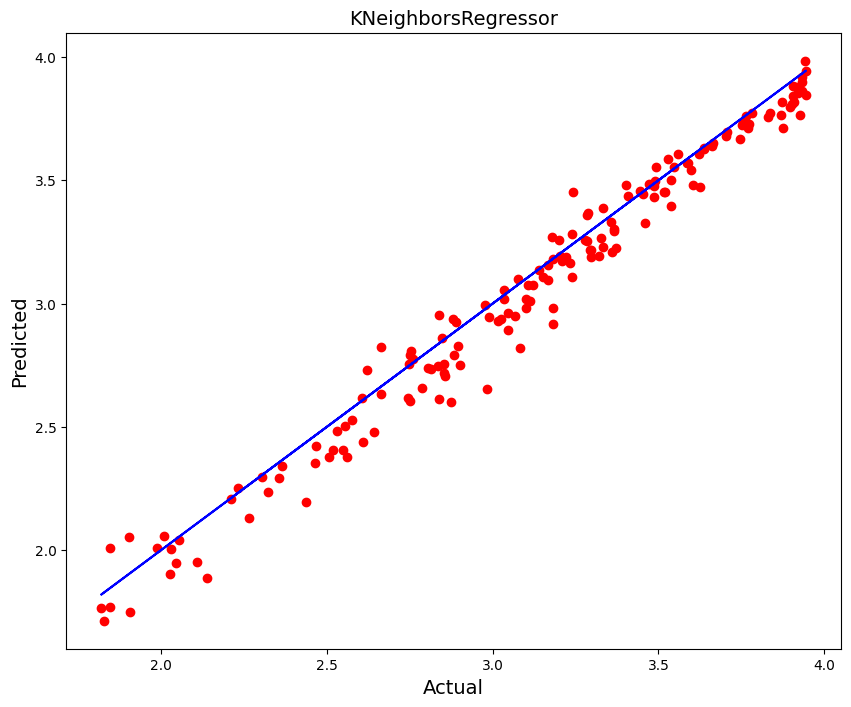

In [83]:
KN=KNN()
KN.fit(x_train,y_train)
pred_KN=KN.predict(x_test)
pred_Train=KN.predict(x_train)
print(KN)
print('R2_Score:', r2_score(y_test,pred_KN))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_KN))
print('Mean scuared error: :', mean_squared_error(y_test,pred_KN))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_KN)))

plt.figure(figsize=(10,8))
plt.scatter(x=pred_KN,y=y_test,color='red')
plt.plot(pred_KN,pred_KN,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=14)
plt.show()

GradientBoostingRegressor()
R2_Score: 0.961806423530636
R2 Score on traing data:  0.99694607781029
Mean absulute error: 0.0851079728158981
Mean scuared error: : 0.012581608450538538
Root Mean scuared error: : 0.11216776921441622


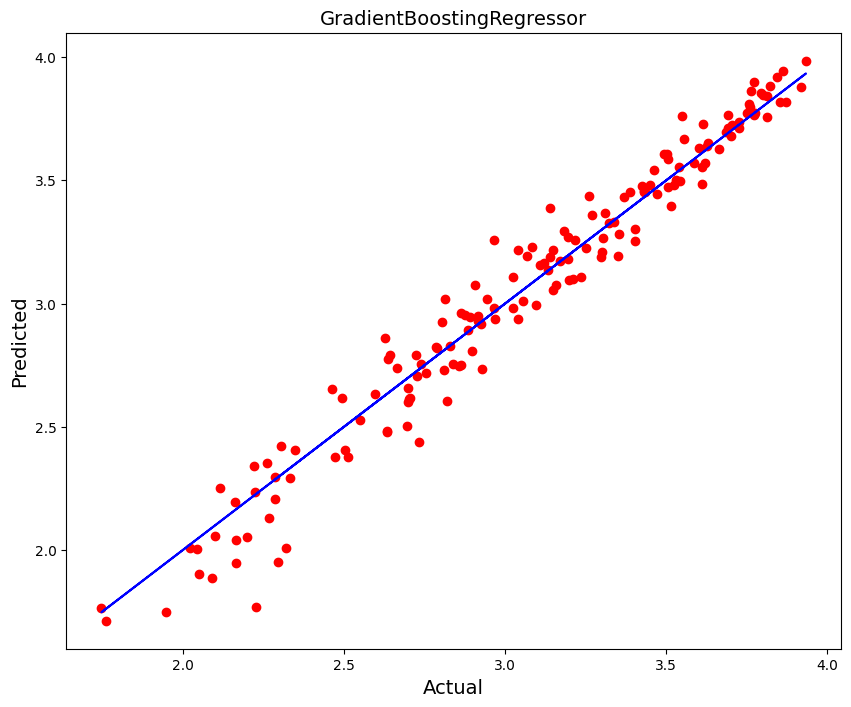

In [84]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_Train=GBR.predict(x_train)
print(GBR)
print('R2_Score:', r2_score(y_test,pred_GBR))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_GBR))
print('Mean scuared error: :', mean_squared_error(y_test,pred_GBR))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_GBR)))

plt.figure(figsize=(10,8))
plt.scatter(x=pred_GBR,y=y_test,color='red')
plt.plot(pred_GBR,pred_GBR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=14)
plt.show()

Lasso()
R2_Score: -0.014455876944349022
R2 Score on traing data:  0.0
Mean absulute error: 0.4848711818314259
Mean scuared error: : 0.33417888068951557
Root Mean scuared error: : 0.5780820708943633


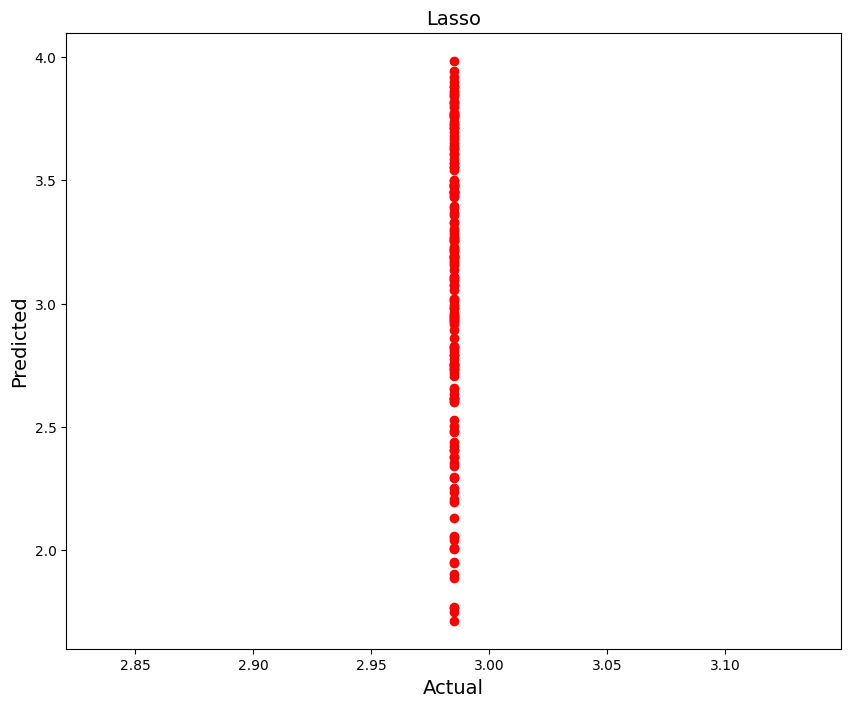

In [85]:
LS=Lasso()
LS.fit(x_train,y_train)
pred_LS=LS.predict(x_test)
pred_Train=LS.predict(x_train)
print(LS)
print('R2_Score:', r2_score(y_test,pred_LS))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_LS))
print('Mean scuared error: :', mean_squared_error(y_test,pred_LS))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_LS)))

plt.figure(figsize=(10,8))
plt.scatter(x=pred_LS,y=y_test,color='red')
plt.plot(pred_LS,pred_LS,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso',fontsize=14)
plt.show()

Ridge()
R2_Score: 0.9645470159794706
R2 Score on traing data:  0.8998803222798801
Mean absulute error: 0.08219104781271175
Mean scuared error: : 0.011678811061522125
Root Mean scuared error: : 0.10806854797544994


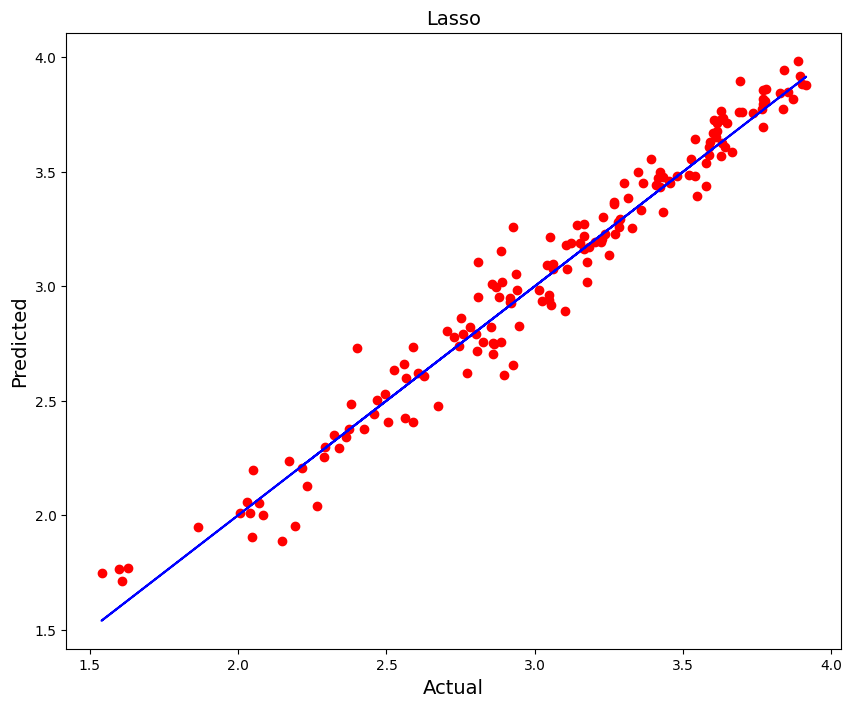

In [86]:
RD=Ridge()
RD.fit(x_train,y_train)
pred_RD=RD.predict(x_test)
pred_Train=RD.predict(x_train)
print(RD)
print('R2_Score:', r2_score(y_test,pred_RD))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_RD))
print('Mean scuared error: :', mean_squared_error(y_test,pred_RD))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_RD)))

plt.figure(figsize=(10,8))
plt.scatter(x=pred_RD,y=y_test,color='red')
plt.plot(pred_RD,pred_RD,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Ridge',fontsize=14)
plt.show()

DecisionTreeRegressor()
R2_Score: 0.8122700178152636
R2 Score on traing data:  1.0
Mean absulute error: 0.18617177914110428
Mean scuared error: : 0.06184142331288345
Root Mean scuared error: : 0.24867935843749367


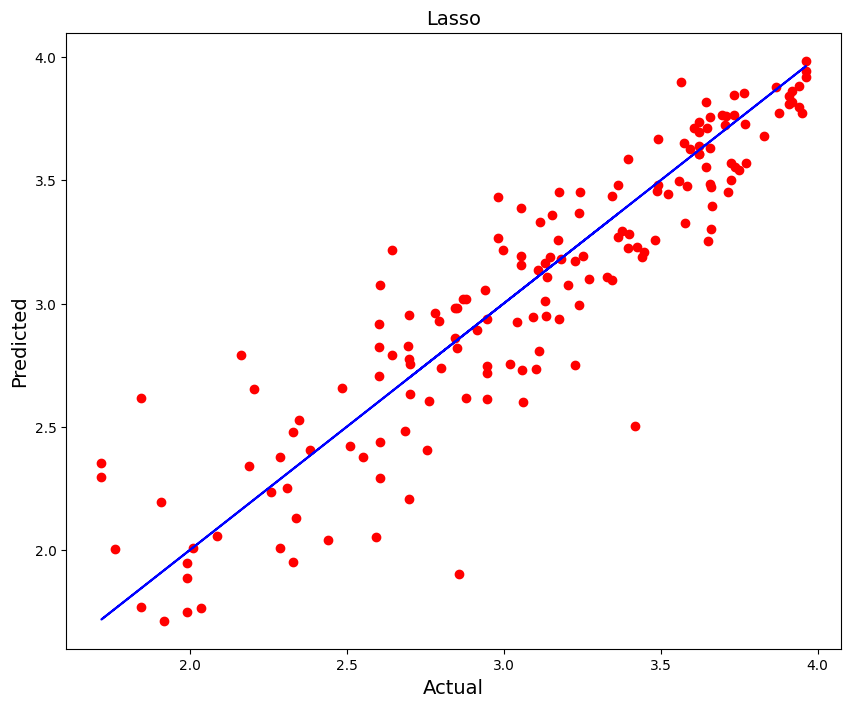

In [87]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
pred_Train=DT.predict(x_train)
print(DT)
print('R2_Score:', r2_score(y_test,pred_DT))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_DT))
print('Mean scuared error: :', mean_squared_error(y_test,pred_DT))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_DT)))

plt.figure(figsize=(10,8))
plt.scatter(x=pred_DT,y=y_test,color='red')
plt.plot(pred_DT,pred_DT,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('DT',fontsize=14)
plt.show()

SVR()
R2_Score: 0.971337194351172
R2 Score on traing data:  0.971100987270303
Mean absulute error: 0.07418480758774454
Mean scuared error: : 0.00944201174919303
Root Mean scuared error: : 0.09717001466086661


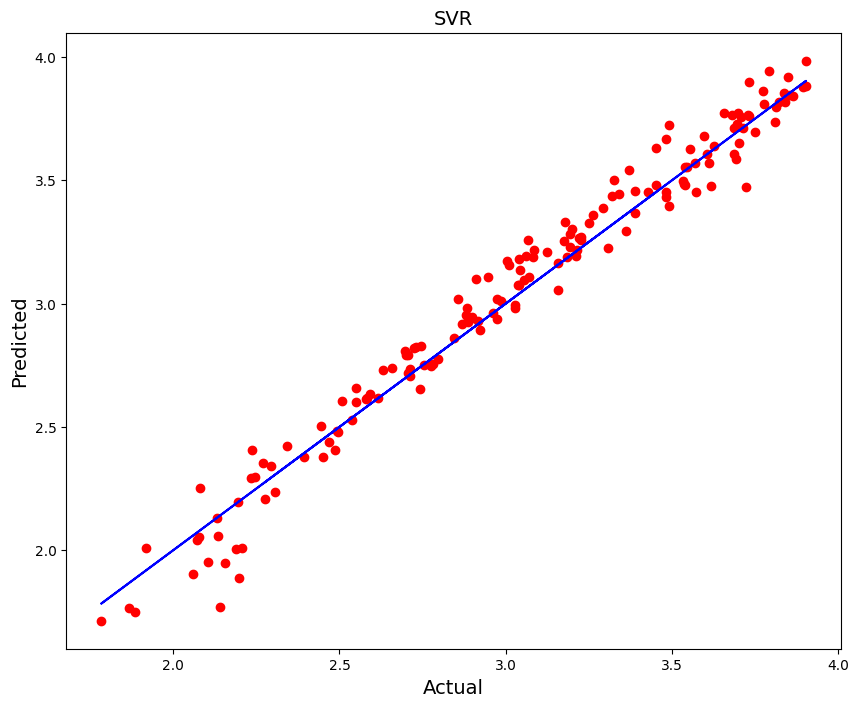

In [88]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_Train=svr.predict(x_train)
print(svr)
print('R2_Score:', r2_score(y_test,pred_svr))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_svr))
print('Mean scuared error: :', mean_squared_error(y_test,pred_svr))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_svr)))

plt.figure(figsize=(10,8))
plt.scatter(x=pred_svr,y=y_test,color='red')
plt.plot(pred_svr,pred_svr,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('SVR',fontsize=14)
plt.show()

ExtraTreesRegressor()
R2_Score: 0.9611181739822603
R2 Score on traing data:  1.0
Mean absulute error: 0.08376840490797542
Mean scuared error: : 0.012808329463190183
Root Mean scuared error: : 0.11317389037755211


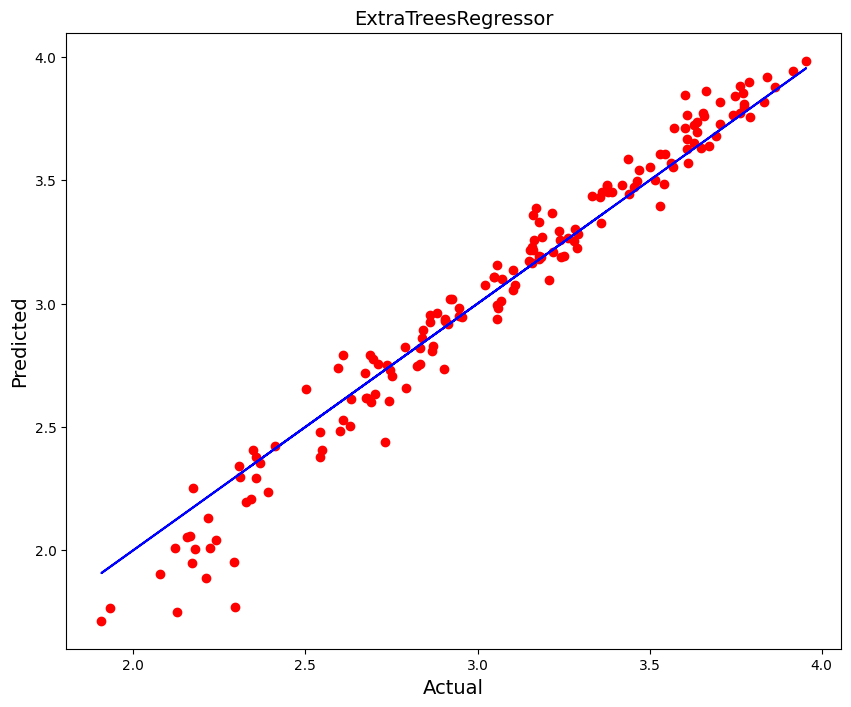

In [89]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_Train=etr.predict(x_train)
print(etr)
print('R2_Score:', r2_score(y_test,pred_etr))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_etr))
print('Mean scuared error: :', mean_squared_error(y_test,pred_etr))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_etr)))

plt.figure(figsize=(10,8))
plt.scatter(x=pred_etr,y=y_test,color='red')
plt.plot(pred_etr,pred_etr,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=14)
plt.show()

In [ ]:
# cross validation

In [90]:
from sklearn.model_selection import cross_val_score


In [91]:
score1=cross_val_score(LR,x,y,cv=5, scoring='r2')
print(score1)
print(score1.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,predLR)-score1.mean()*100))

[0.83738719 0.9566319  0.92774638 0.95828687 0.74938503]
0.8858874743414088
Difference between r2score and cross validation score is:  -87.62455144881272


In [93]:
score2=cross_val_score(RDF,x,y,cv=5, scoring='r2')
print(score2)
print(score2.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_RDF)-score2.mean()*100))

[0.81375821 0.928759   0.91895283 0.93733761 0.69255928]
0.8582733868084966
Difference between r2score and cross validation score is:  -84.8786305899042


In [94]:
score3=cross_val_score(KN,x,y,cv=5, scoring='r2')
print(score3)
print(score3.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_KN)-score3.mean()*100))

[0.86011739 0.94039635 0.95066523 0.94246777 0.71511295]
0.8817519404378158
Difference between r2score and cross validation score is:  -87.20614254529129


In [95]:
score4=cross_val_score(GBR,x,y,cv=5, scoring='r2')
print(score4)
print(score4.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_GBR)-score4.mean()*100))

[0.86068539 0.95977667 0.89068276 0.93247116 0.78736782]
0.8861967632847387
Difference between r2score and cross validation score is:  -87.65786990494324


In [96]:
score5=cross_val_score(LS,x,y,cv=5, scoring='r2')
print(score5)
print(score5.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_LS)-score5.mean()*100))

[-0.01698306 -0.02585486 -0.0021066  -0.01899261 -0.05257542]
-0.02330250952260533
Difference between r2score and cross validation score is:  2.315795075316184


In [97]:
score6=cross_val_score(DT,x,y,cv=5, scoring='r2')
print(score6)
print(score6.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_DT)-score6.mean()*100))

[0.72400488 0.82052327 0.58756736 0.76312333 0.50161326]
0.6793664216208418
Difference between r2score and cross validation score is:  -67.12437214426892


In [98]:
score7=cross_val_score(svr,x,y,cv=5, scoring='r2')
print(score7)
print(score7.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_svr)-score7.mean()*100))

[0.88737977 0.96912754 0.94972054 0.95646605 0.83459691]
0.919458164060725
Difference between r2score and cross validation score is:  -90.97447921172132


In [99]:
score8=cross_val_score(etr,x,y,cv=5, scoring='r2')
print(score8)
print(score8.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_etr)-score8.mean()*100))

[0.85829279 0.9415367  0.94514205 0.95471116 0.75453148]
0.8908428345686866
Difference between r2score and cross validation score is:  -88.1231652828864


In [102]:
score9=cross_val_score(RD,x,y,cv=5, scoring='r2')
print(score9)
print(score9.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_RD)-score9.mean()*100))

[0.83764138 0.9568465  0.92821936 0.95854902 0.74941408]
0.8861340668338187
Difference between r2score and cross validation score is:  -87.64885966740239


In [ ]:
# svr is our best model as Difference between r2score and cross validation score is leaset among all

In [106]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Type of kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels
    'epsilon': [0.1, 0.01, 0.001]  # Epsilon-tube
}

# Create GridSearchCV object
gscv = GridSearchCV(SVR(), param, cv=5)
gscv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.01, 0.001],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [107]:
PR=gscv.best_params_
PR

{'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}

In [108]:
Model=SVR(C= 10,epsilon= 0.01,gamma= 'scale',kernel= 'rbf')
Model

SVR(C=10, epsilon=0.01)

In [109]:
Model.fit(x_train,y_train)
pred_Model=Model.predict(x_test)

print('R2_Score:', r2_score(y_test,pred_Model))

print('Mean absulute error:', mean_absolute_error(y_test,pred_Model))
print('Mean scuared error: :', mean_squared_error(y_test,pred_Model))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_Model)))

R2_Score: 0.976957579665825
Mean absulute error: 0.06559152253574009
Mean scuared error: : 0.00759056200536396
Root Mean scuared error: : 0.08712383144331957


In [110]:
import joblib 

In [111]:
import pickle
filename='CGPA of a student based .pk'
pickle.dump(Model,open(filename,'wb')) #saved the Model

In [112]:
loaded_Model=pickle.load(open('CGPA of a student based .pk','rb'))
result=loaded_Model.score(x_test,y_test)
print(result*100)


97.69575796658249


In [113]:
conculusion=pd.DataFrame([loaded_Model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conculusion

0         1         2         3         4         5    \
Predicted  3.487215  2.204615  3.203501  3.419985  3.290976  3.515755   
Original   3.481000  2.352000  3.219000  3.452000  3.266000  3.555000   

                6         7         8         9    ...       153       154  \
Predicted  2.083104  3.758151  2.440525  2.158165  ...  2.207318  2.761779   
Original   2.129000  3.759000  2.484000  2.056000  ...  2.298000  2.793000   

                155       156      157       158       159       160  \
Predicted  3.538201  2.556353  3.16433  2.805988  2.451643  3.190253   
Original   3.668000  2.528000  3.18900  2.821000  2.505000  3.189000   

                161     162  
Predicted  2.783954  2.2595  
Original   2.706000  2.2080  

[2 rows x 163 columns]